In [2]:
import sys
sys.path.append('../src')

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import yaml
import torch

import dataloader
from trainer import Trainer

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
def plot_scale(config, w, s, nrow, ncol, figsize, vmin, vmax, aspect=20, filename=None):
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize, constrained_layout=True)

    axs = axs.ravel()
    cmap = plt.get_cmap('coolwarm')
    for i in range(w.shape[0]):
        axs[i].imshow(w[i,s].reshape(config['g'],config['g']), cmap=cmap, vmin=vmin, vmax=vmax)
        axs[i].axis('off')

    norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

    cbar = fig.colorbar(sm, ax=axs, ticks=np.linspace(vmin, vmax, 5), 
                        orientation='vertical', pad=0.01, shrink=0.99, aspect=aspect)
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
config_path = '../configs/best/mnist/ours_029.yaml'

with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

t = Trainer(config, device='cpu')
t._load_checkpoint(best=t.best)
model = t.model

w = model.glimpse.fc1.weight.detach().numpy()
# normalize between [-1,1]
# w = 2 * (w - w.min()) / (w.max() - w.min()) - 1
w.shape # units x flattented features

[*] Loading model from ../ckpt/hyper/mnist
[*] Loaded ours_029_model_best.pth.tar checkpoint @ epoch 173 with best valid acc of 99.010


(256, 64)

In [5]:
w = np.expand_dims(w, 1)
w.shape

(256, 1, 64)

In [6]:
vmin, vmax = w.min(), w.max()
nrow = 16
ncol = 16
figsize=(8, 8)

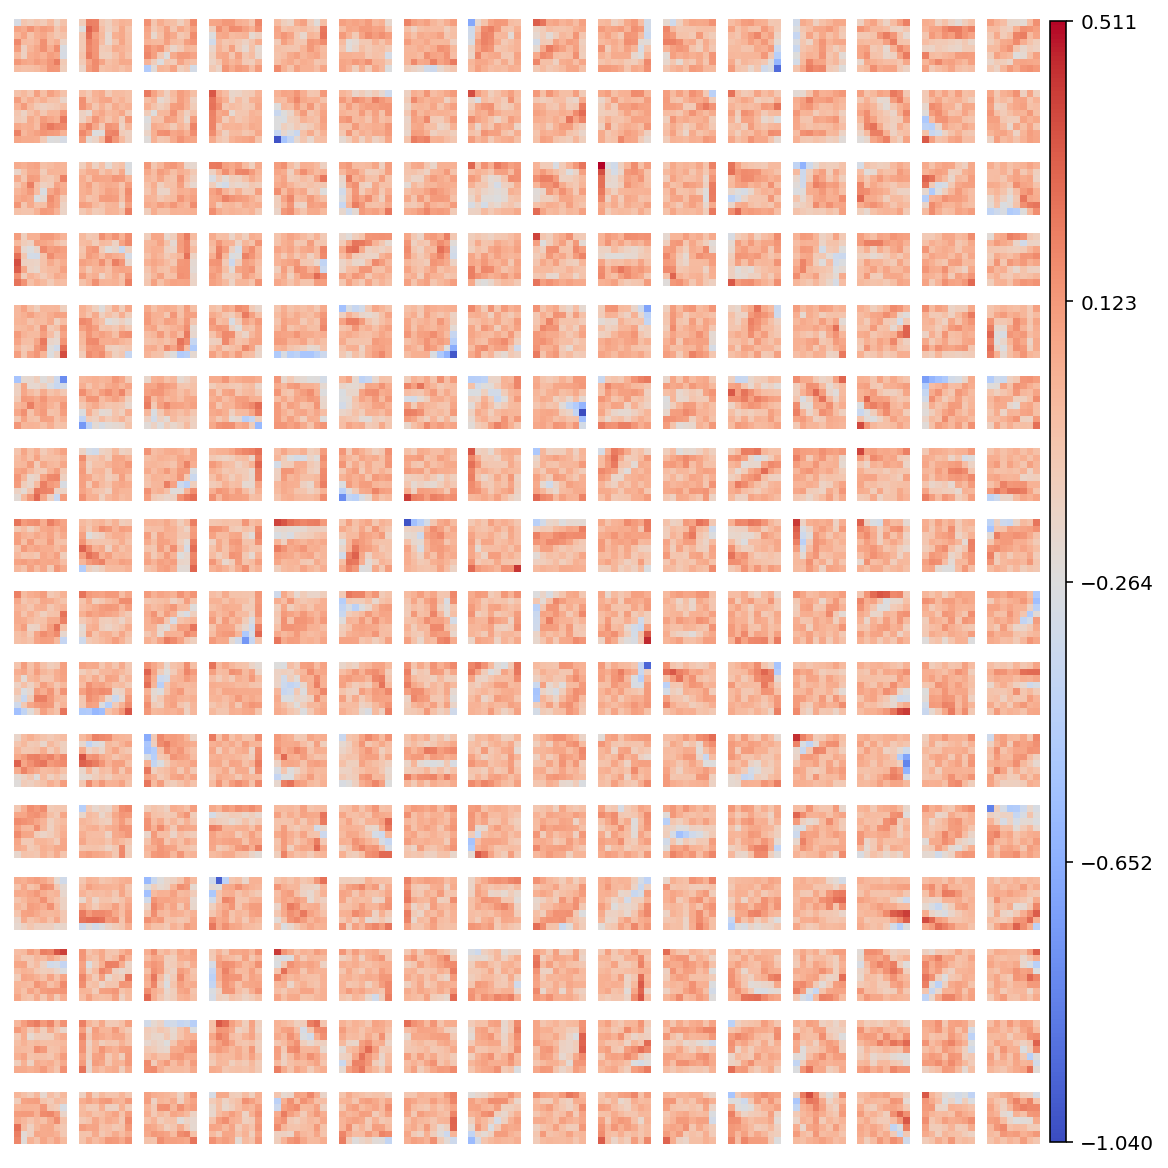

In [8]:
s = 0
plot_scale(config, w, s, nrow, ncol, figsize, vmin, vmax, aspect=70,
           filename=os.path.join(config['plot_dir'], 
                                 config['model_name'], 
                                 f'mnist_glimpse_w_{s}.pdf'))

In [12]:
config_path = '../configs/best/cluttered/ours_008.yaml'

with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

t = Trainer(config, device='cpu')
t._load_checkpoint(best=t.best)
model = t.model

w = model.glimpse.fc1.weight.detach().numpy()
# normalize between [-1,1]
# w = 2 * (w - w.min()) / (w.max() - w.min()) - 1
w.shape # units x flattented features

[*] Loading model from ../ckpt/hyper/cluttered
[*] Loaded ours_008_model_best.pth.tar checkpoint @ epoch 366 with best valid acc of 93.790


(512, 432)

In [13]:
w = w.reshape(-1, config['k'], config['g'], config['g'])
w.shape

(512, 3, 12, 12)

In [19]:
vmin, vmax = w.min(), w.max()
nrow = 32
ncol = 16
figsize = (10,18)

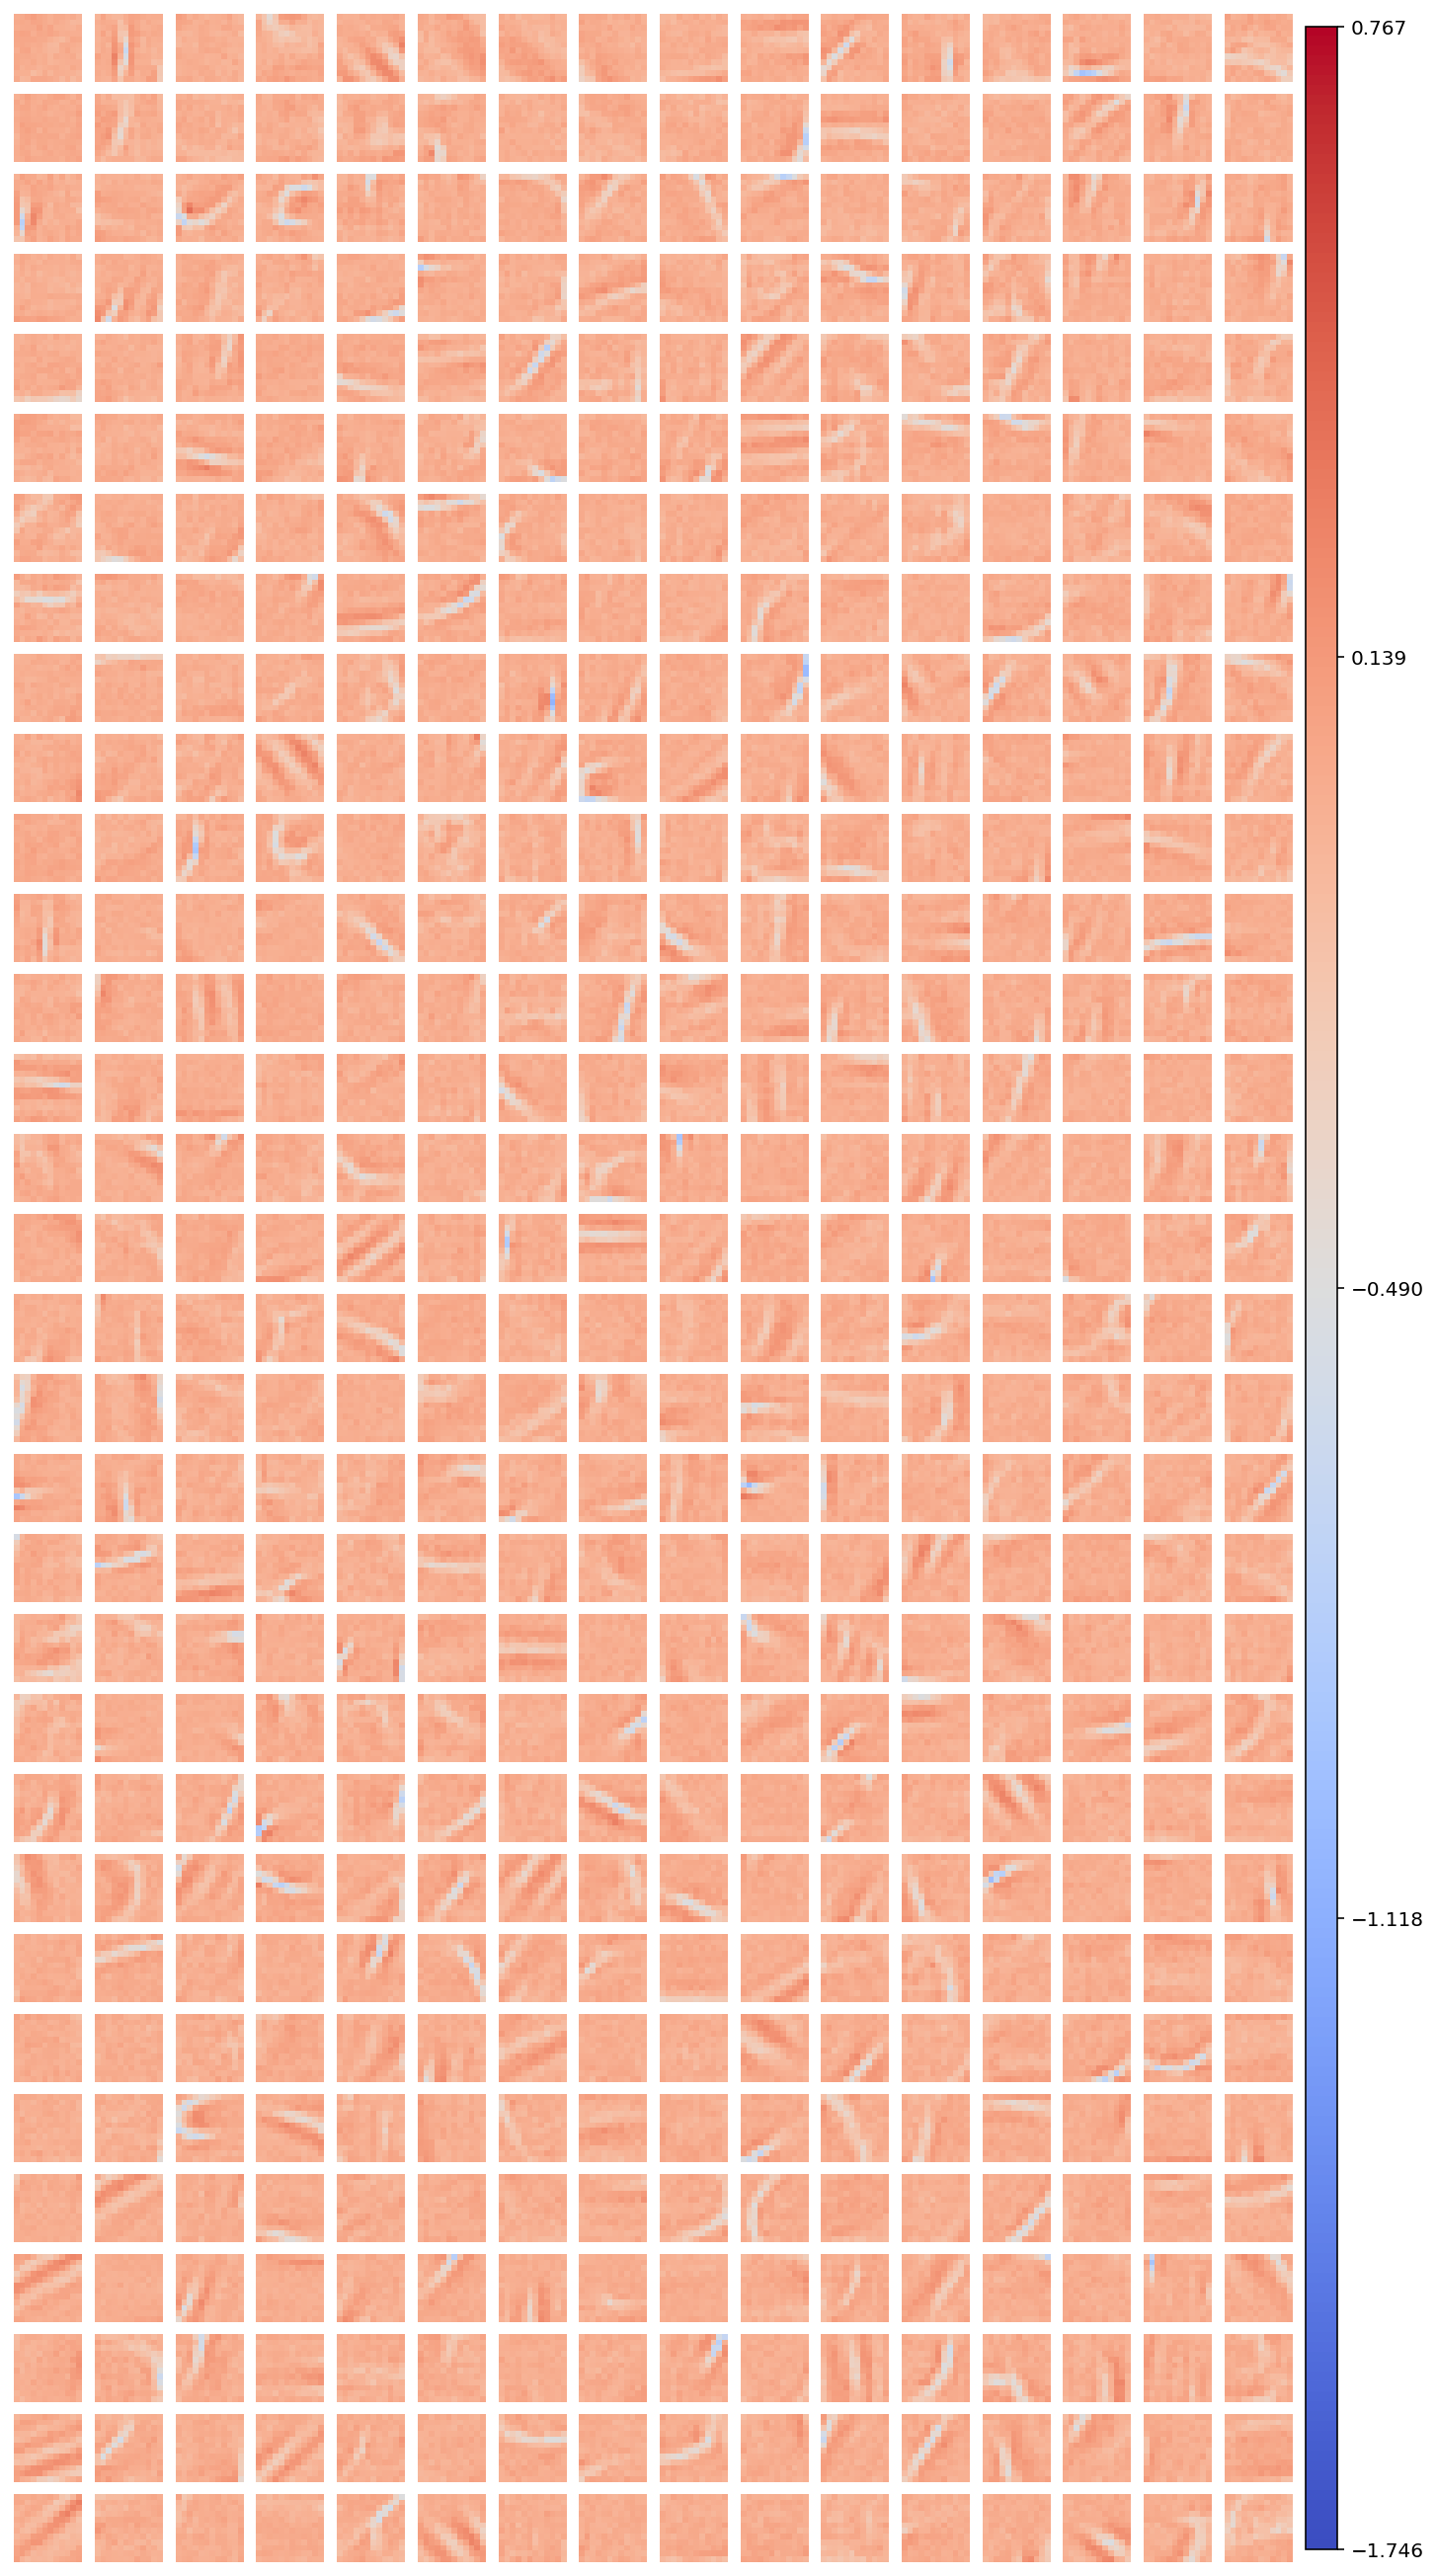

In [20]:
s = 0
plot_scale(config, w, s, nrow, ncol, figsize, vmin, vmax, aspect=80,
           filename=os.path.join(config['plot_dir'], 
                                 config['model_name'], 
                                 f'glimpse_w_{s}.png'))

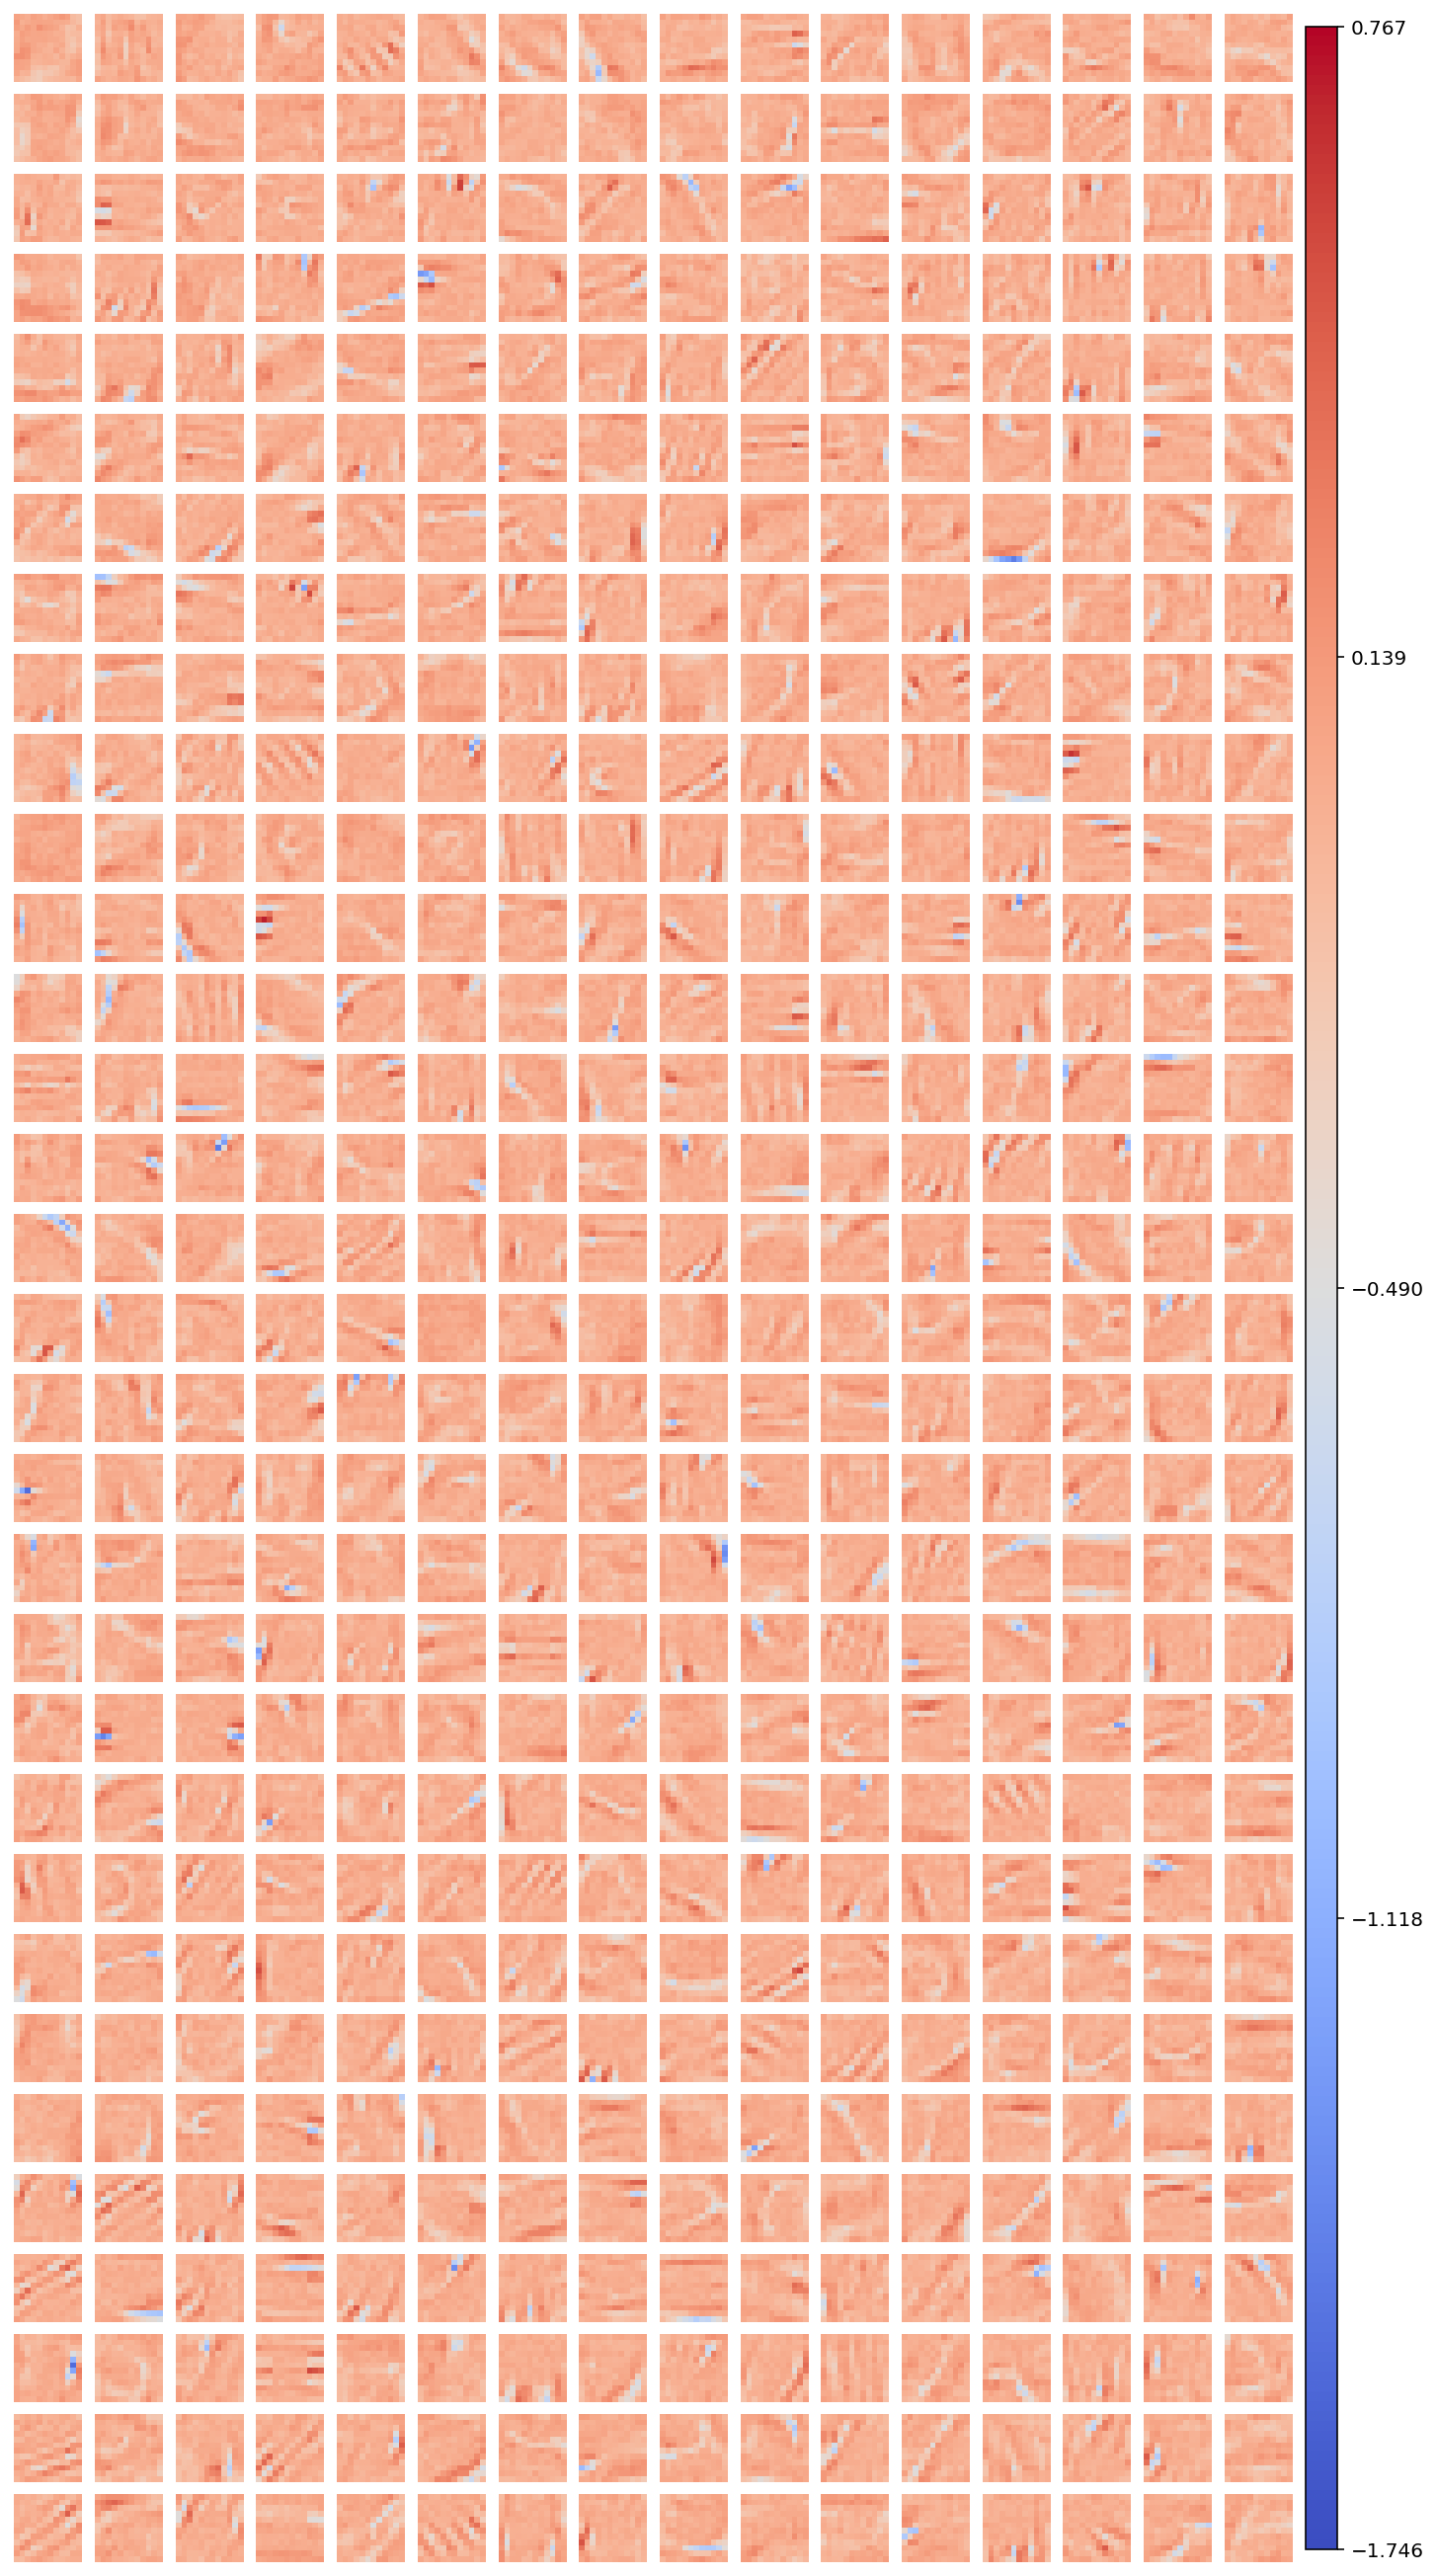

In [21]:
s = 1
plot_scale(config, w, s, nrow, ncol, figsize, vmin, vmax, aspect=80,
           filename=os.path.join(config['plot_dir'], 
                                 config['model_name'], 
                                 f'glimpse_w_{s}.png'))

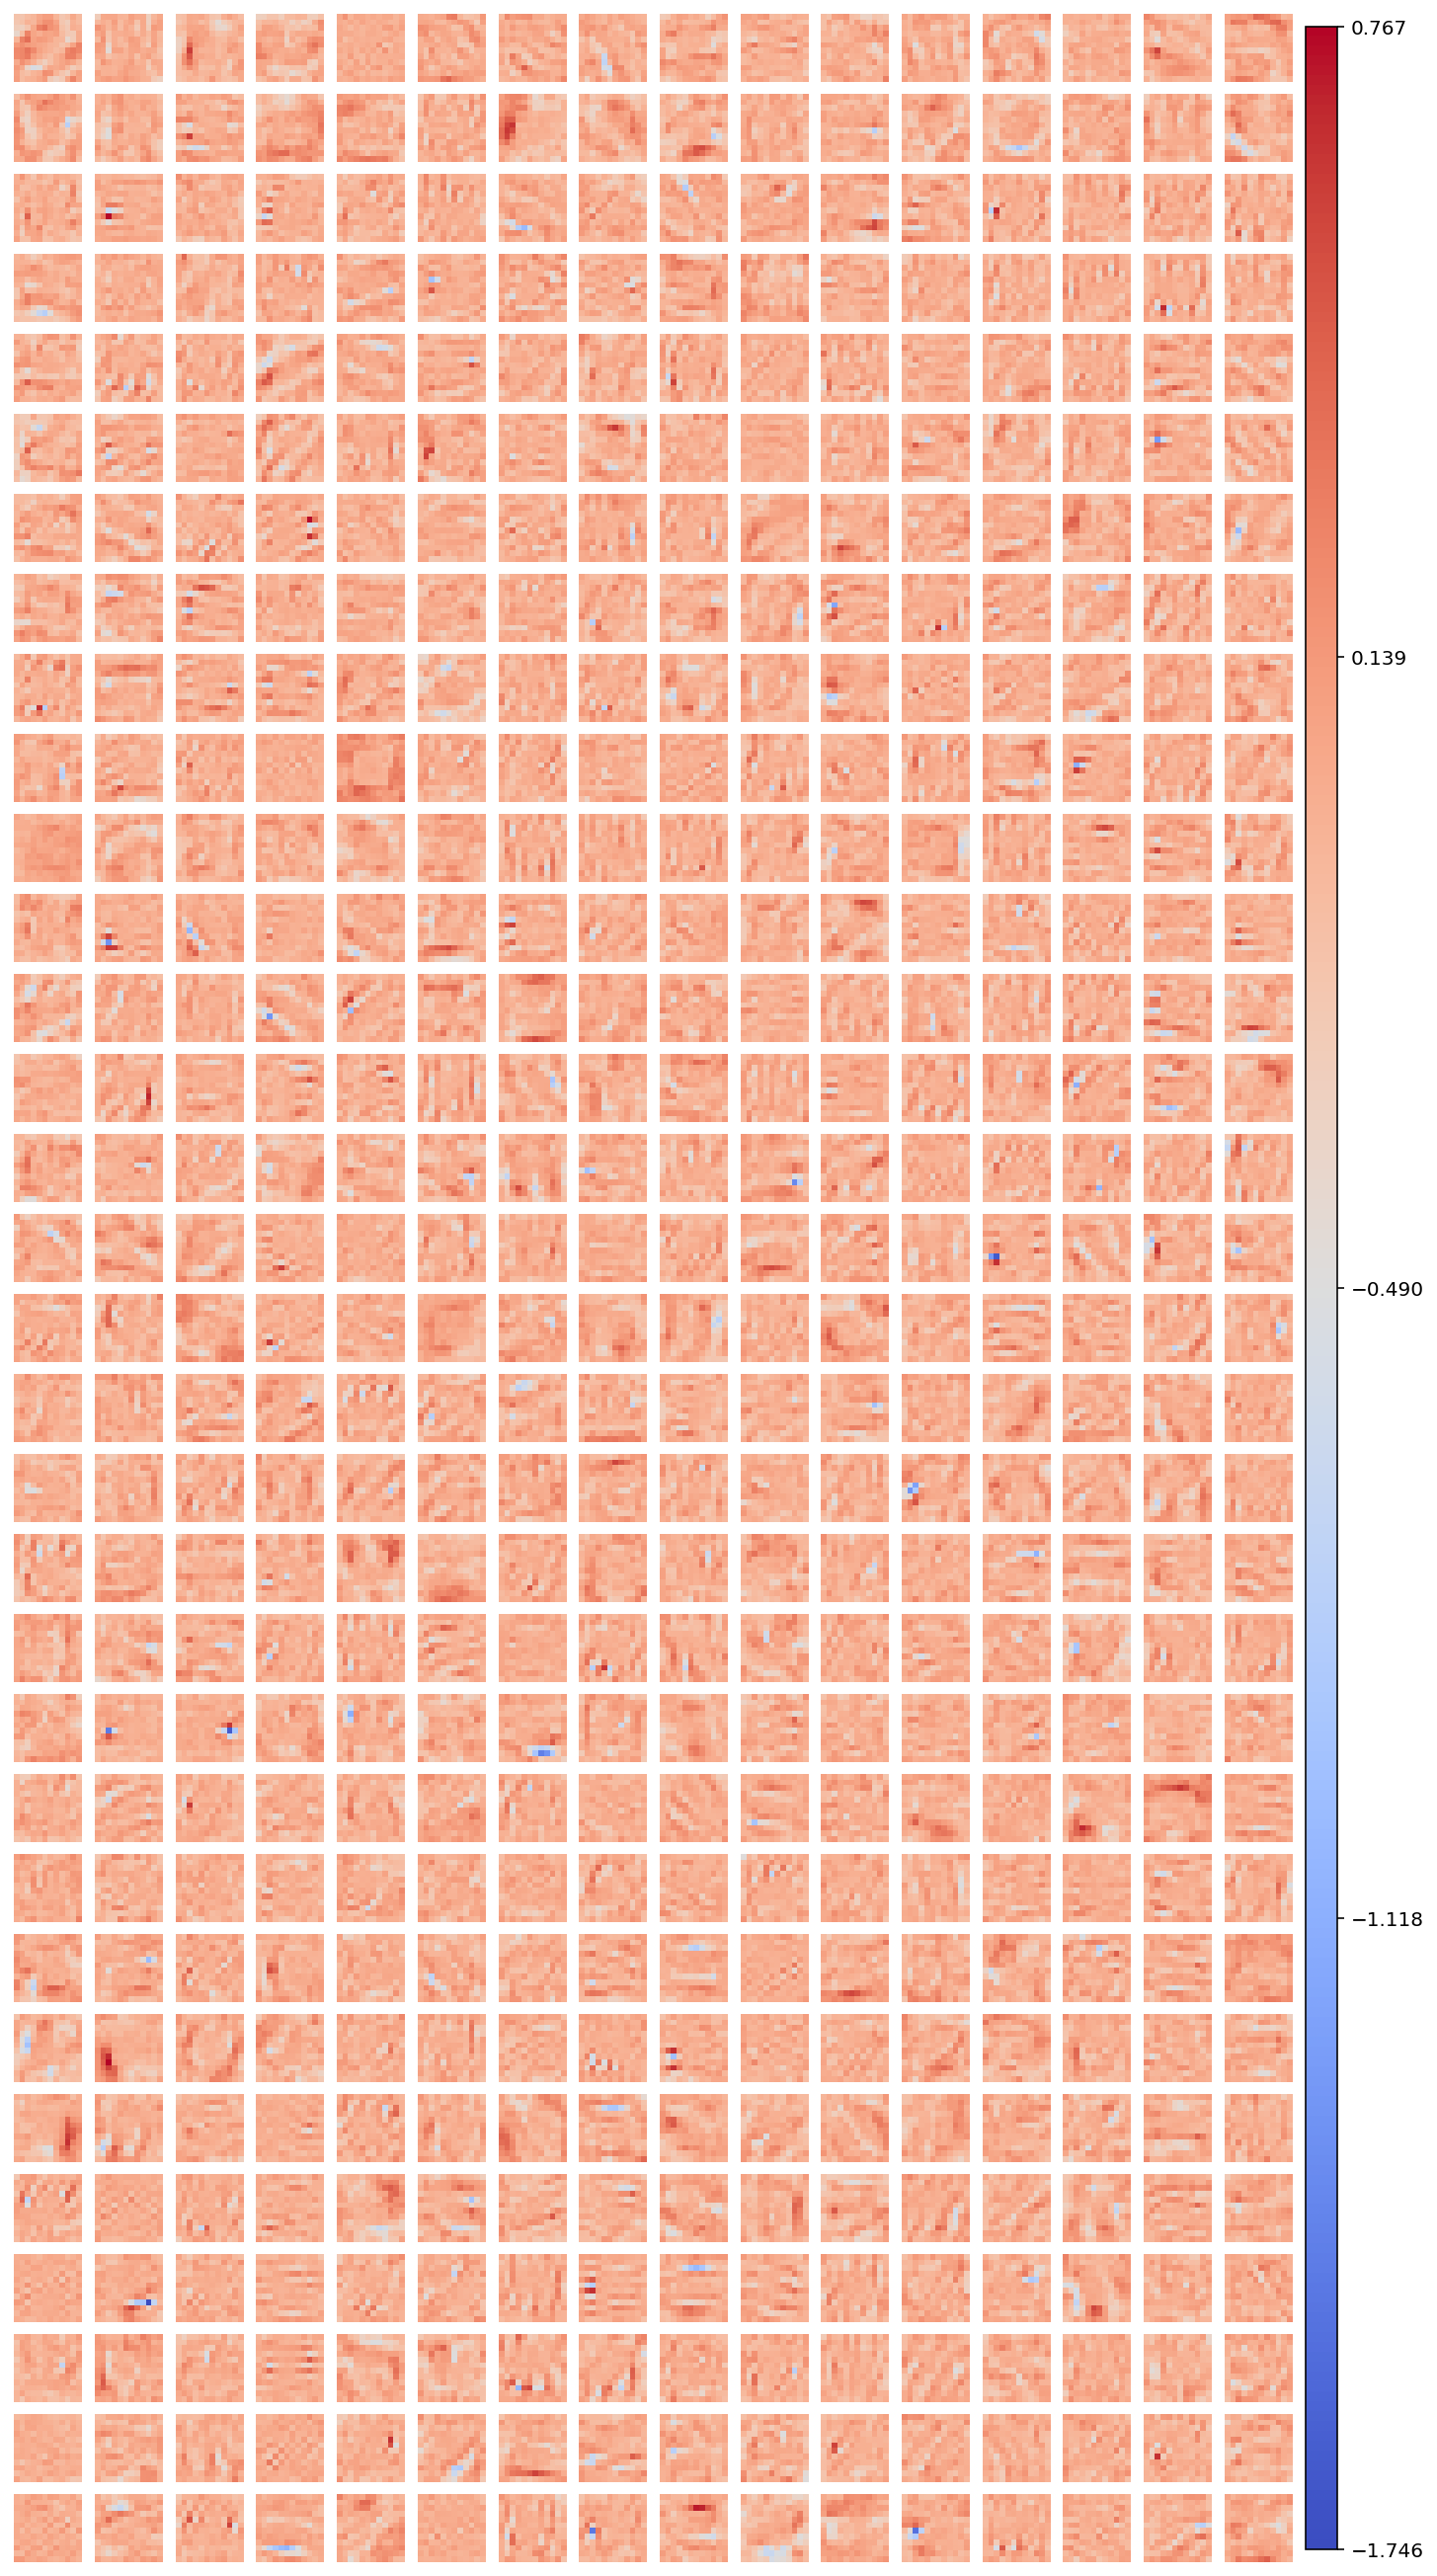

In [22]:
s = 2
plot_scale(config, w, s, nrow, ncol, figsize, vmin, vmax, aspect=80,
           filename=os.path.join(config['plot_dir'], 
                                 config['model_name'], 
                                 f'glimpse_w_{s}.png'))